In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_ta as ta

In [36]:
data = pd.read_csv('fase 2\dados-2020-2024.csv', dtype=str, dayfirst=True, parse_dates=[0], index_col='Data') #importando os dados, importamos tudo como string para evitar perder os 0 (a esquerda e direita) dos números. E também já convertendo a coluna "Data" para o tipo datetime. Deixa a coluna data como o índice da tabela.
# using last 4 years only

data.head() #verificando os dados
# renaming columns
data.columns = ['Close', 'Open', 'High', 'Low', 'Volume', 'Var%'] #renomeando as colunas

#Excluindo a coluna que não vamos usar para a análise
data.drop(columns=['Var%'], inplace=True)

#Renomeando as colunas restantes, para não termos problemas com funções futuras (pois tem acentos)
data.head() #verificando sucesso das alterações


#Alterando os tipos dos dados
#data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%Y') # Convertendo a coluna "Data" para o tipo datetime
data['Close'] = data['Close'].str.replace('.', '').astype(int) # Convertendo a coluna para o tipo inteiro
data['Open'] = data['Open'].str.replace('.', '').astype(int) # Convertendo a coluna para o tipo inteiro
data['High'] = data['High'].str.replace('.', '').astype(int) # Convertendo a coluna para o tipo inteiro
data['Low'] = data['Low'].str.replace('.', '').astype(int) # Convertendo a coluna para o tipo inteiro
data['Volume'] = data['Volume'].str[:-1].str.replace(',', '.').astype(float) * data['Volume'].str[-1:].map({'K':1000, 'M':1000000, 'B':1000000000}) #Convertendo de texto para número
data.head() #verificando o resultado

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\chris\AppData\Local\Temp\ipykernel_15584\162861344.py:1: SyntaxWarning: invalid escape sequence '\d'
  data = pd.read_csv('fase 2\dados-2020-2024.csv', dtype=str, dayfirst=True, parse_dates=[0], index_col='Data') #importando os dados, importamos tudo como string para evitar perder os 0 (a esquerda e direita) dos números. E também já convertendo a coluna "Data" para o tipo datetime. Deixa a coluna data como o índice da tabela.


,Close,Open,High,Low,Volume
Data,,,,,
2024-07-17,129510,129112,129658,128741,6.670000e+06
2024-07-16,129110,129322,129521,128761,6.820000e+09
2024-07-15,129321,128898,129485,128723,5.830000e+09
2024-07-12,128897,128293,129015,128002,7.210000e+09
2024-07-11,128294,127221,128326,127221,7.970000e+09


In [37]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Data'], axis=1, inplace=True)

C:\Users\chris\AppData\Local\Temp\ipykernel_15584\1275881204.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]


In [53]:
data_set = data.iloc[:, 0:10]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,127093,127154,126526,37.421446,130336.632480,128547.422323,127247.120000,1084.0,1,127094.0
1,126010,127289,125562,38.235125,130027.810339,128518.641683,127245.091921,387.0,1,126010.0
2,125623,126581,125566,35.244947,129645.161735,128468.965610,127228.733087,-1284.0,0,125623.0
3,126907,127538,125614,34.221241,129262.098713,128412.609856,127207.465099,101.0,1,126903.0
4,126802,127489,126491,40.359970,129037.422645,128382.716591,127203.432449,-1380.0,0,126803.0
5,128183,128183,126643,40.047134,128824.620488,128351.435074,127198.128708,854.0,1,128185.0
6,127331,128185,126656,46.219641,128763.704251,128348.139330,127211.199851,1163.0,1,127331.0
7,126168,127399,126168,43.270112,128627.256227,128327.997958,127212.786608,-375.0,0,126166.0
8,126541,127388,126018,39.578494,128392.850872,128285.186117,127198.921884,812.0,1,126538.0
9,125726,126916,125388,41.292079,128216.198408,128250.588372,127190.167952,214.0,1,125731.0


In [39]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [40]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.94517061 0.93652691 0.95577504 ... 0.60256013 1.         0.94521323]
 [0.92904782 0.93865002 0.94156409 ... 0.571688   1.         0.92908371]
 [0.92328649 0.92751549 0.94162306 ... 0.49767462 0.         0.9233253 ]
 ...
 [0.79300899 0.7780329  0.80008845 ... 0.51782788 0.         0.79320299]
 [0.80543977 0.78795647 0.80456991 ... 0.51658768 0.         0.8055382 ]
 [0.81819806 0.80501997 0.82037296 ... 0.68392612 1.         0.81842395]]


In [41]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

981
[[[0.94517061 0.93652691 0.95577504 ... 1.         1.         0.60256013]
  [0.92904782 0.93865002 0.94156409 ... 0.99934888 0.99994676 0.571688  ]
  [0.92328649 0.92751549 0.94162306 ... 0.99822504 0.99951731 0.49767462]
  ...
  [0.72842851 0.7233196  0.74308248 ... 0.94600481 0.96647255 0.52039686]
  [0.73987673 0.73286573 0.74619297 ... 0.9398993  0.96180009 0.48917039]
  [0.7618204  0.75076275 0.75568659 ... 0.93425919 0.9574569  0.64034194]]

 [[0.92904782 0.93865002 0.94156409 ... 0.99934888 0.99994676 0.571688  ]
  [0.92328649 0.92751549 0.94162306 ... 0.99822504 0.99951731 0.49767462]
  [0.9424016  0.94256597 0.94233066 ... 0.99695008 0.99895899 0.55902024]
  ...
  [0.73987673 0.73286573 0.74619297 ... 0.9398993  0.96180009 0.48917039]
  [0.7618204  0.75076275 0.75568659 ... 0.93425919 0.9574569  0.64034194]
  [0.73298398 0.74359136 0.75402079 ... 0.92939199 0.95368444 0.51326571]]

 [[0.92328649 0.92751549 0.94162306 ... 0.99822504 0.99951731 0.49767462]
  [0.9424016  0.94

In [42]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [43]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

760
(760, 30, 8)
(191, 30, 8)
(760, 1)
(191, 1)
[[0.73297027]
 [0.74683808]
 [0.73230069]
 [0.73780615]
 [0.75043895]
 [0.75127221]
 [0.77876975]
 [0.7880844 ]
 [0.77647829]
 [0.79577716]
 [0.79110496]
 [0.76758028]
 [0.75290897]
 [0.73972562]
 [0.74453174]
 [0.74173437]
 [0.76610719]
 [0.78854567]
 [0.77613606]
 [0.75524507]
 [0.7532512 ]
 [0.77902271]
 [0.78027259]
 [0.78229622]
 [0.82023926]
 [0.80760646]
 [0.81418326]
 [0.82117668]
 [0.83061036]
 [0.81251674]
 [0.80942178]
 [0.79327739]
 [0.76991638]
 [0.77991548]
 [0.79994346]
 [0.80657977]
 [0.80830581]
 [0.77629974]
 [0.8029789 ]
 [0.81590929]
 [0.79681874]
 [0.7777133 ]
 [0.79540517]
 [0.81190667]
 [0.7824599 ]
 [0.75676279]
 [0.77134482]
 [0.76499122]
 [0.77406779]
 [0.78268309]
 [0.79219117]
 [0.8108651 ]
 [0.81510579]
 [0.81598369]
 [0.82611672]
 [0.83043181]
 [0.8323364 ]
 [0.84837663]
 [0.85243877]
 [0.85822694]
 [0.86856828]
 [0.84243966]
 [0.83950838]
 [0.87774901]
 [0.86953546]
 [0.85962563]
 [0.84288605]
 [0.81113293]


In [47]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.2)

Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1113 - val_loss: 0.0026
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.7191e-04 - val_loss: 0.0015
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010 - val_loss: 9.7574e-04
Epoch 9/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012 - val_loss: 9.5839e-04
Epoch 10/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.6192e-04 - val_loss: 0.0012
Epoch 11/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.7519e-04 - val_loss: 8.6110e-04
Epoch 12/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/ste

In [48]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[0.49126798] [0.48387049]
[0.47055757] [0.45302503]
[0.48505372] [0.47479392]
[0.46973425] [0.46175937]
[0.46505532] [0.44653751]
[0.47313634] [0.46269678]
[0.48770595] [0.49741095]
[0.49074864] [0.49760438]
[0.48963335] [0.4786031]
[0.5082119] [0.50180043]


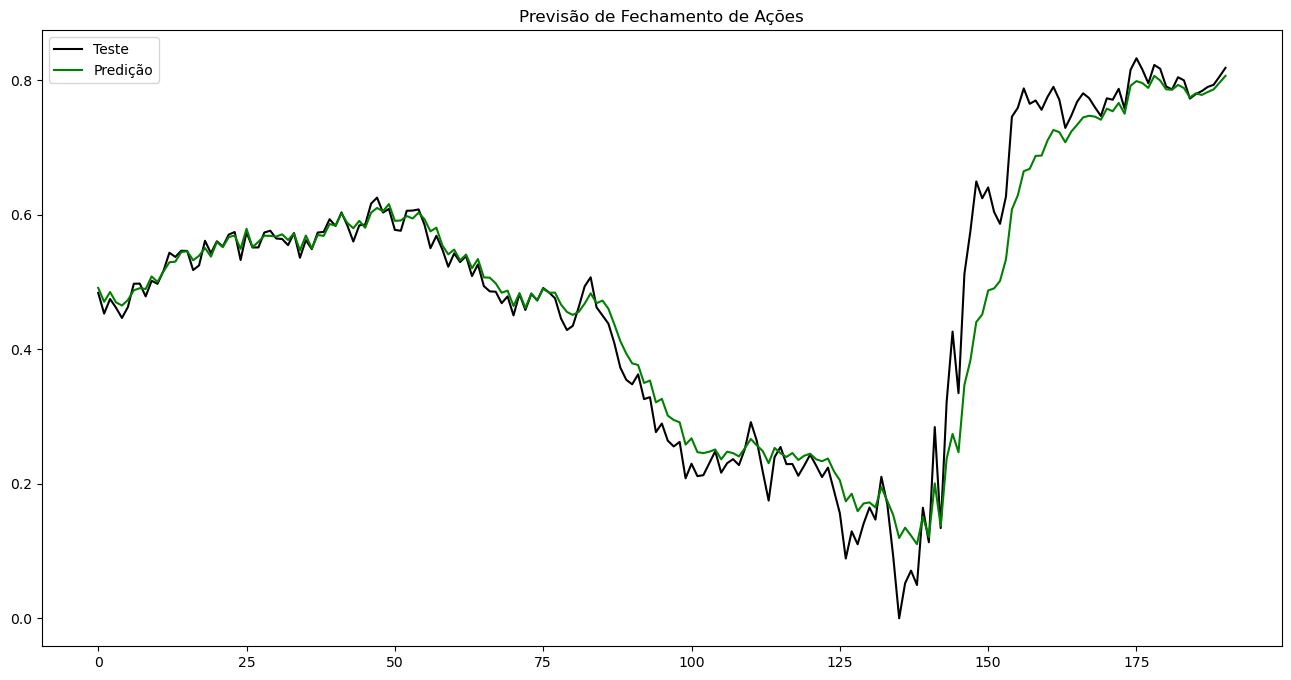

In [54]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Teste')
plt.plot(y_pred, color = 'green', label = 'Predição')
plt.title('Previsão de Fechamento de Ações')
plt.legend()
plt.show()